# Clickstream Analysis with R

Clickstream refers to the order of pages that people are visiting on the given site. It is curcial in understanding how users navigate web pages.

Consider following sample data(This data is stored in data.csv):

    1) A,C,E
    2) A,B,D
    3) A,D,A,B
    4) B,D,C
    5) B,A,E
    
For Prediction we use first/second order markov model. It is implemented using Clickstream package of R.
Packages used in this project are:

    1) ClickStream
    2) arulesSequences

In [1]:
library("clickstream")
library("arulesSequences")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: reshape2
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:reshape2’:

    dcast, melt

Loading required package: MASS
Loading required package: arules
Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write


Attaching package: ‘arulesSequences’

The following object is masked from ‘package:igraph’:

    similarity



In [2]:
## Load Data
cls <- readClickstreams(file = "./data.csv", sep = ",", header = F)
cls
summary(cls)

Clickstreams

1: A C E
2: A B D
3: A D A B
4: B D C
5: B A E

Observations: 5

Click Frequencies:
A B C D E 
5 4 2 3 2 


In [3]:
## Fitting Markov Chain
mc <- fitMarkovChain(clickstreamList = cls, order = 2) #Check order
options(digits = 2)
mc

Higher-Order Markov Chain (order=2)

Transition Probabilities:

Lag:  1 
lambda:  0.82 
    A    B C   D E
A 0.0 0.33 0 0.5 0
B 0.4 0.00 0 0.0 0
C 0.2 0.00 0 0.5 0
D 0.2 0.67 0 0.0 0
E 0.2 0.00 1 0.0 0

Lag:  2 
lambda:  0 
     A   B C D E
A 0.33 0.0 0 0 0
B 0.00 0.0 0 1 0
C 0.00 0.5 0 0 0
D 0.33 0.0 0 0 0
E 0.33 0.5 0 0 0

Start Probabilities:

  A   B 
0.6 0.4 

End Probabilities:

  B   C   D   E 
0.2 0.2 0.2 0.4 

In [4]:
##compute transition probabilities
options(digits = 7)
summary(mc)

Higher-Order Markov Chain (order=2) with 5 states.
 The Markov Chain has absorbing states.

Observations: 16
LogLikelihood: -8.146417
AIC: 40.29283
BIC: 49.5639

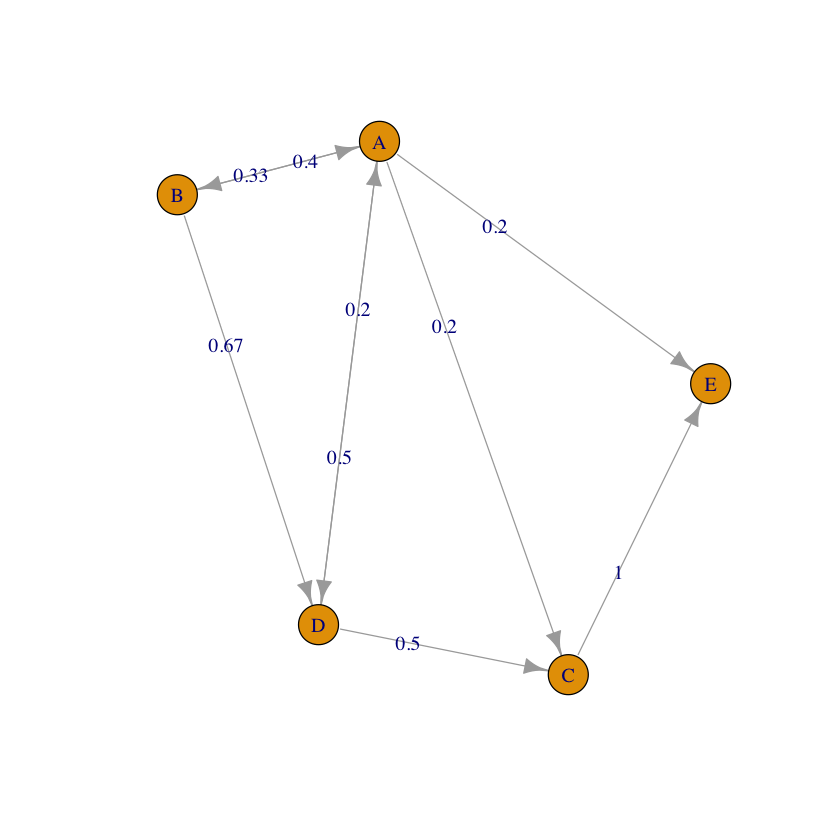

In [5]:
##plot transition diagram and heatmap
plot(mc)

In [6]:
##clustering
set.seed(42)
clusters <- clusterClickstreams(clickstreamList = cls, order = 1, centers = 2)
clusters
summary(clusters)

[[1]]
Clickstreams

1: A C E
5: B A E

[[2]]
Clickstreams

2: A B D
3: A D A B
4: B D C


Centers:
Cluster 1:
    A   C E   B D
A 0.0 0.0 0 0.5 0
C 0.5 0.0 0 0.0 0
E 0.5 0.5 0 0.0 0
B 0.0 0.0 0 0.0 0
D 0.0 0.0 0 0.0 0


Cluster 2:
          A C E         B         D
A 0.0000000 0 0 0.0000000 0.3333333
C 0.0000000 0 0 0.0000000 0.3333333
E 0.0000000 0 0 0.0000000 0.0000000
B 0.5000000 0 0 0.0000000 0.0000000
D 0.1666667 0 0 0.6666667 0.0000000



Total SS: 7 
Within SS: 2 2.666667 
Total Within SS: 4.666667 
Between SS: 2.333333 


In [7]:
#Predict clicks
pattern <- new("Pattern", sequence = c("C", "E"))
resultPattern <- predict(mc, startPattern = pattern, dist = 1) # set dist = n to predict n steps ahead
resultPattern

Sequence: B
Probability: 0
Absorbing Probabilities: 
  None
1  NaN



In [8]:
##cSPACE data mining
frequencyDF <- frequencies(cls)
frequencyDF
trans <- as.transactions(cls)
sequences <- as(cspade(trans, parameter = list(support = 0)), "data.frame")
sequences


A,C,E,B,D
1,1,1,0,0
1,0,0,1,1
2,0,0,1,1
0,1,0,1,1
1,0,1,1,0


sequence,support
<{A}>,0.8
<{B}>,0.8
<{C}>,0.4
<{D}>,0.6
<{E}>,0.4
"<{A},{E}>",0.4
"<{B},{E}>",0.2
"<{C},{E}>",0.2
"<{A},{C},{E}>",0.2
"<{B},{A},{E}>",0.2
